# Simple example of Markov Chain Monte Carlo 

This example is based on that given in the paper 'An Introduction to MCMC for machine learning' by Andrieu et al 20003

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Number of samples drawn
sample_number=100000


In [3]:
# Functions and dataframe that we want to use


def poly_want_to_sample(x):
    """The polynomial we want to sample - known up to the normalising constant """
    return 0.3 * np.exp(-0.2 * x * x) + 0.7 * np.exp(-0.2 * (x - 10) * (x - 10))


def mcmc_threshold(x, y):
    """Function that generates the mcmc probaility threshold for accepting the proposed state
         x is the state, y is the proposed new state"""
    ratio = (poly_want_to_sample(y) * norm.pdf(x, y, 100)) / (
        poly_want_to_sample(x) * norm.pdf(y, x, 100)
    )

    return min(ratio, 1)

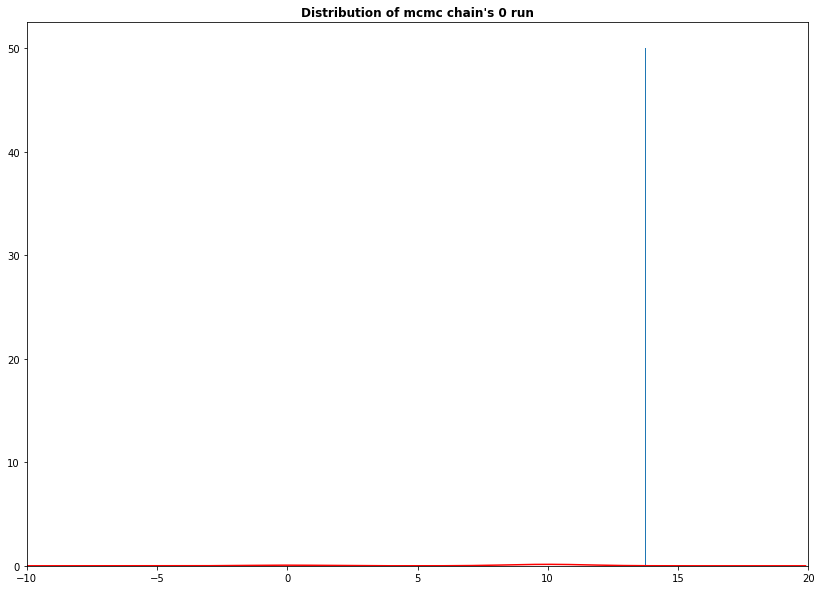

None


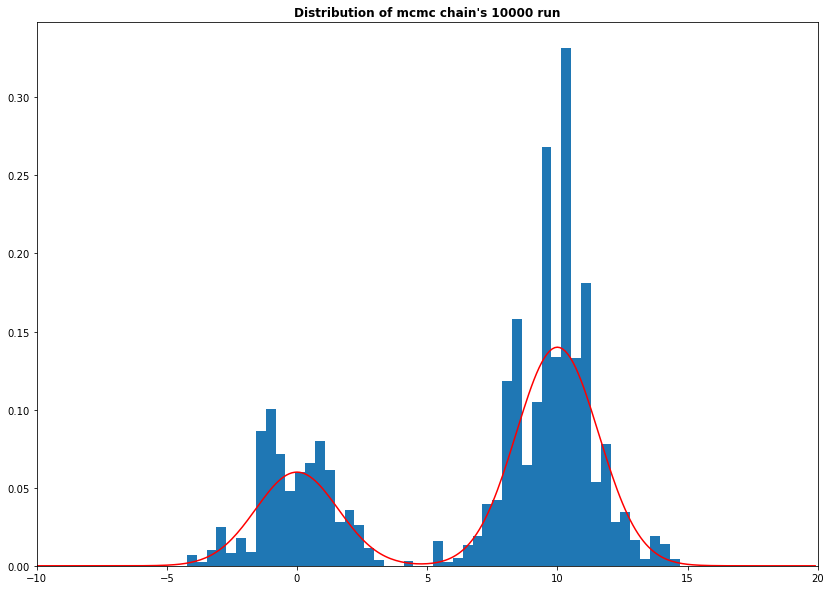

None


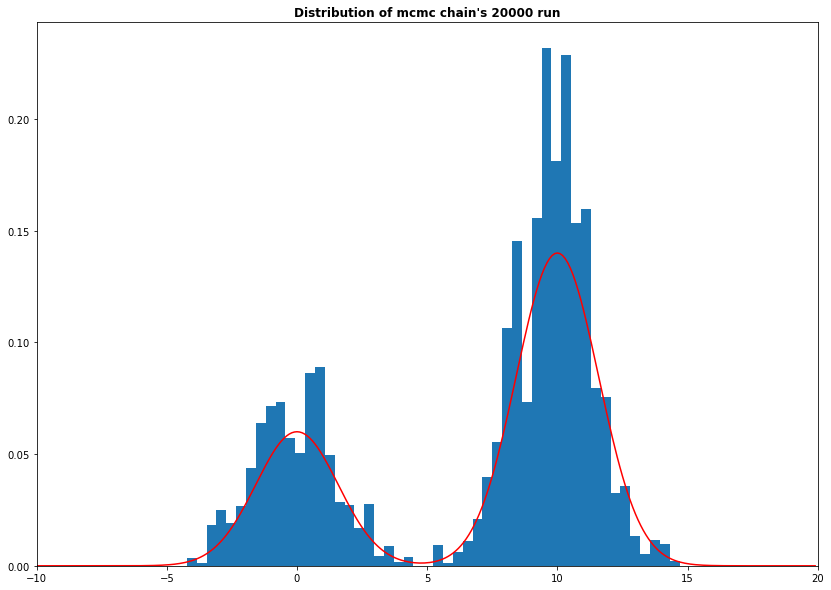

None


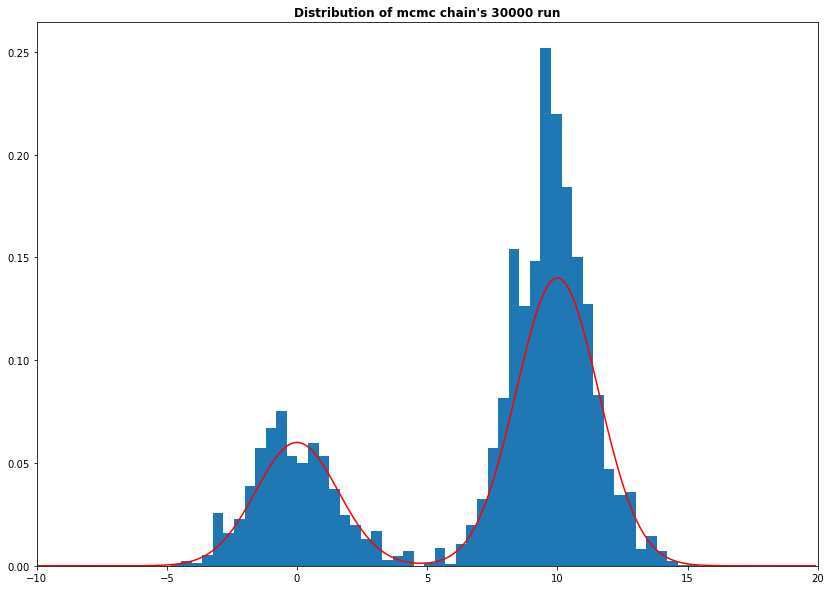

None


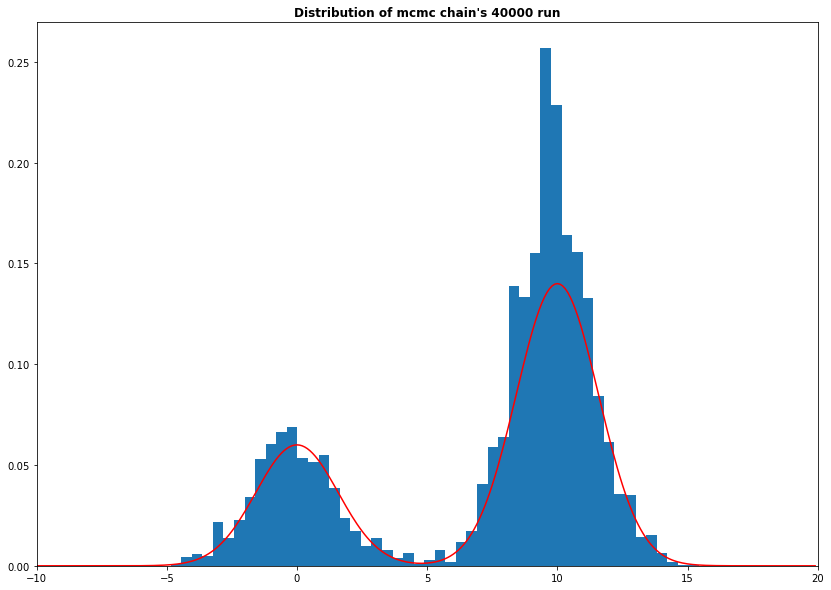

None


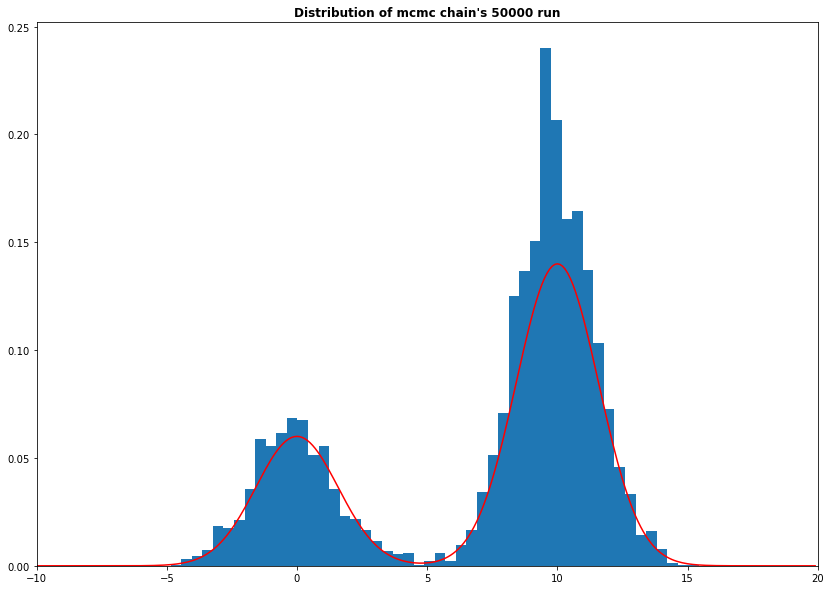

None


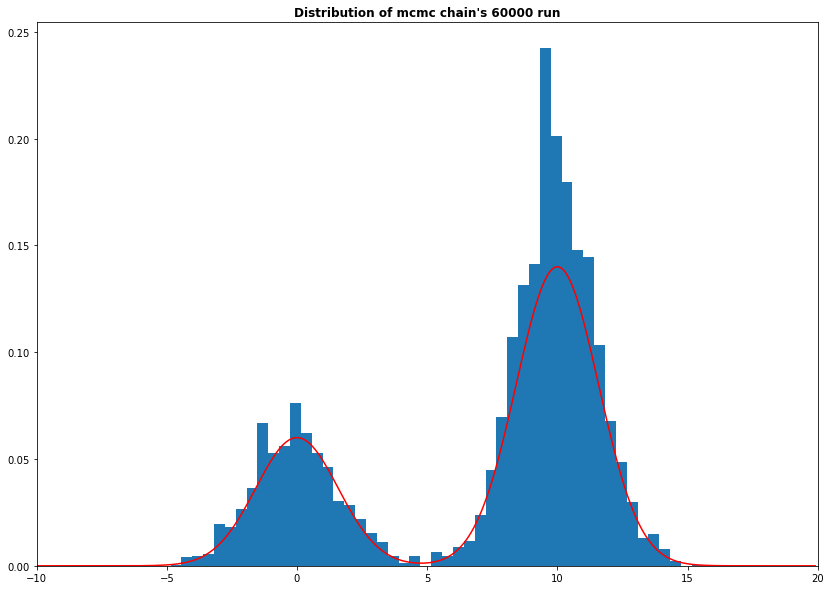

None


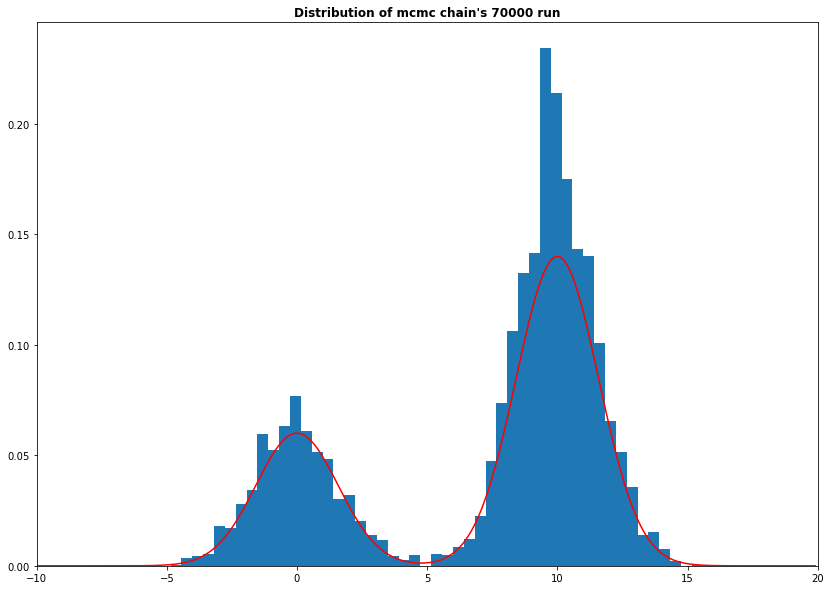

None


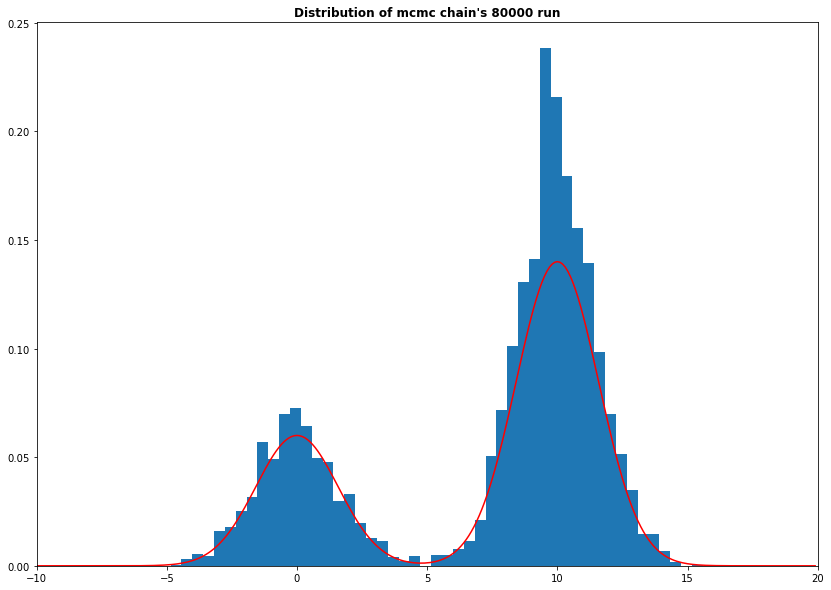

None


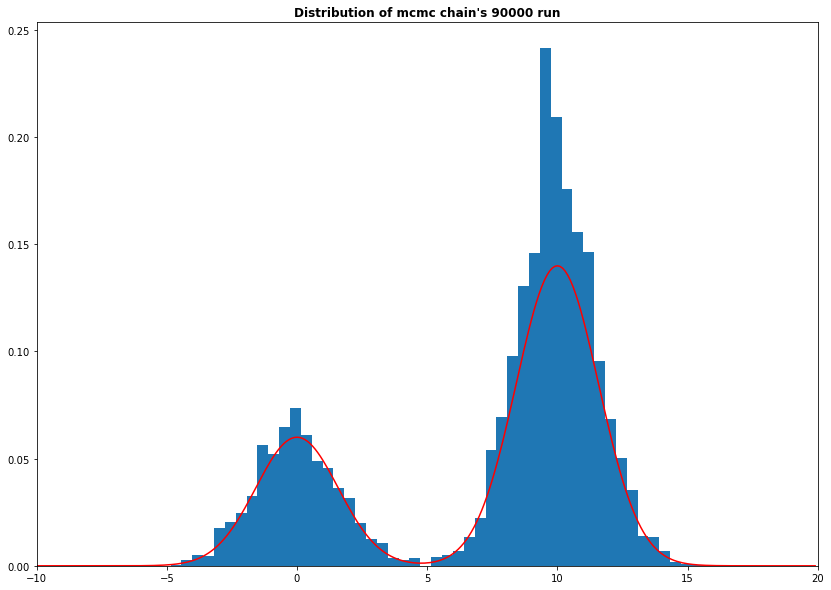

None


In [4]:
# Create a data frame to hold the results
data_store = pd.DataFrame(index=range(sample_number), columns=["state_of_chain"])


# Create an initial value to start the chain
initial_value=np.random.normal(10,10)

state = initial_value

# Run the samples
for i in range(0, sample_number):

    prop_value = np.random.normal(state, 100)
    prob_sample = np.random.uniform(0, 1)
    # Condition for accepting the proposed stat
    if prob_sample < mcmc_threshold(state, prop_value):
        state = prop_value
    else:
        state = state
    # Storing the value in the dataframe
    data_store["state_of_chain"].loc[i] = state
    # Prints charts at regular intervals
    if i % 10000 == 0:
        plt.figure(figsize=(14, 10))
        plt.xlim(-10, 20)
        plt.hist(data_store["state_of_chain"], density=True, bins=50)
        plt.title("Distribution of mcmc chain's " + str(i) + " run", weight="bold")
        x = np.arange(-10, 20, 0.1)
        plt.plot(x, poly_want_to_sample(x)*0.2, color="red")
        print(plt.show())